In [37]:
!pip install catboost

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor


In [12]:
cmap = plt.get_cmap('jet', 20)

In [13]:
fe=pd.read_csv("LPFe_Map.csv")
fe_image=fe.to_numpy()

k=pd.read_csv("LPK_Map.csv")
k_image=fe.to_numpy()

th=pd.read_csv("LPTh_Map.csv")
th_image=fe.to_numpy()

ti=pd.read_csv("LPTi_Map.csv")
ti_image=fe.to_numpy()

maps=pd.read_csv("Albedo_Map.csv")
maps_image=fe.to_numpy()

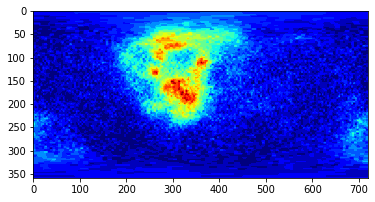

In [15]:
plt.imshow(fe, cmap=cmap)


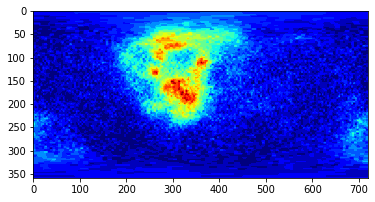

In [20]:
plt.imshow(k, cmap=cmap)

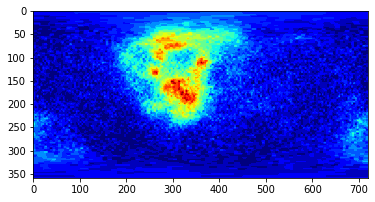

In [16]:
plt.imshow(th, cmap=cmap)

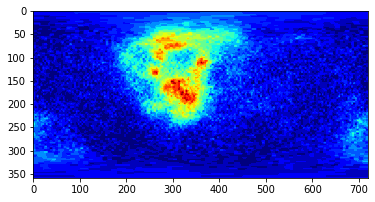

In [17]:
plt.imshow(ti, cmap=cmap)

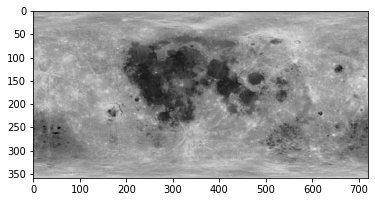

In [19]:

plt.imshow(maps, cmap="Greys_r")

In [27]:
fe_c=fe_image.reshape(-1, 1).squeeze()
k_c=k_image.reshape(-1, 1).squeeze()
th_c=th_image.reshape(-1, 1).squeeze()
 
ti_c=ti_image.reshape(-1, 1).squeeze()
map_c=maps_image.reshape(-1, 1).squeeze()


In [32]:
df=pd.concat([pd.DataFrame(fe_c),pd.DataFrame(k_c),pd.DataFrame(th_c),pd.DataFrame(ti_c),pd.DataFrame(map_c)],axis=1)
df.columns = ['fe', 'k','th','ti','moon']
df

,fe,k,th,ti,moon
0,4.04409,4.04409,4.04409,4.04409,4.04409
1,4.04409,4.04409,4.04409,4.04409,4.04409
2,4.04409,4.04409,4.04409,4.04409,4.04409
3,4.04409,4.04409,4.04409,4.04409,4.04409
4,4.04409,4.04409,4.04409,4.04409,4.04409
...,...,...,...,...,...
258475,3.82753,3.82753,3.82753,3.82753,3.82753
258476,3.82753,3.82753,3.82753,3.82753,3.82753
258477,3.82753,3.82753,3.82753,3.82753,3.82753
258478,3.82753,3.82753,3.82753,3.82753,3.82753


In [53]:
X=df.iloc[:,0:4]
r,c = X.shape


258480

In [67]:
y=df.iloc[:,4]
rr=y.shape
rr=int(rr)

(258480,)

In [74]:
X_Train=X.iloc[0:int(r/2),:]
X_test=X.iloc[int(r/2)+1:int(r),:]


In [77]:
y_train=y.iloc[0:(rr/2),4]


TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [78]:
y_test=y.iloc[(rr/2)+1:(rr),4]

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [40]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#randd=RandomForestRegressor()
#randd= LinearRegression()
randd= CatBoostRegressor()
#randd = XGBRegressor()
my_pipeline = make_pipeline(imputer, randd)